In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()
features = pd.DataFrame(data['data'], columns=data['feature_names'])
label = data['target']

In [4]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
def standardize_dataframe_columns(df):
    """
    Standardize the columns of a pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame to standardize.

    Returns:
    --------
    pandas.DataFrame
        A standardized DataFrame.
    """
    # Iterate over each column in the DataFrame.
    for column in df.columns:
        # Calculate the mean and standard deviation of the column.
        mean = df[column].mean()
        std = df[column].std()

        # Standardize the values in the column.
        df[column] = (df[column] - mean) / std

    # Return the standardized DataFrame.
    return df


In [6]:
df = features.copy()

df = standardize_dataframe_columns(df)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [8]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
def calculate_dataframe_covariance(df):
    """
    Calculate the covariance of all the columns in a pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame to calculate the covariance.

    Returns:
    --------
    pandas.DataFrame
        A DataFrame containing the covariance of all columns.
    """
    # Calculate the covariance of all pairs of columns.
    covariance_matrix = []
    for i in range(len(df.columns)):
        row = []
        for j in range(len(df.columns)):
            covariance = df.iloc[:, i].cov(df.iloc[:, j])
            row.append(covariance)
        covariance_matrix.append(row)

    # Convert the covariance matrix to a DataFrame.
    df_covariance = pd.DataFrame(covariance_matrix, columns=df.columns, index=df.columns)

    # Return the DataFrame containing the covariance of all columns.
    return df_covariance


In [10]:
cov = calculate_dataframe_covariance(df)
cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [11]:
def calculate_eigen(df):
    # drop any rows or columns with missing values
    df = df.dropna(axis=0, how='any').dropna(axis=1, how='any')
    
    # convert the dataframe to a numpy array
    A = df.to_numpy()
    
    # calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(A.T))
    
    # convert the eigenvectors back to a dataframe and rename the columns
    eigenvectors_df = pd.DataFrame(eigenvectors, columns=[f"eigenvector_{i+1}" for i in range(len(df.columns))])
    
    return eigenvalues, eigenvectors_df



In [14]:
eigenvalues, eigenvectors = calculate_eigen(df)
print("Eigenvalues::\n",eigenvalues)
print("Eigenvectors::\n", eigenvectors)

Eigenvalues::
 [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors::
    eigenvector_1  eigenvector_2  eigenvector_3  eigenvector_4
0       0.521066      -0.377418      -0.719566       0.261286
1      -0.269347      -0.923296       0.244382      -0.123510
2       0.580413      -0.024492       0.142126      -0.801449
3       0.564857      -0.066942       0.634273       0.523597


In [13]:
evec

,eigenvector_1,eigenvector_2,eigenvector_3,eigenvector_4
0,0.521066,-0.377418,-0.719566,0.261286
1,-0.269347,-0.923296,0.244382,-0.123510
2,0.580413,-0.024492,0.142126,-0.801449
3,0.564857,-0.066942,0.634273,0.523597


In [66]:
eval

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [34]:
def plot_explained_variance(eigenvalues):
    explained_var = eigenvalues / np.sum(eigenvalues)
    plt.plot(range(1, len(explained_var)+1), explained_var, 'ro-', linewidth=2)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

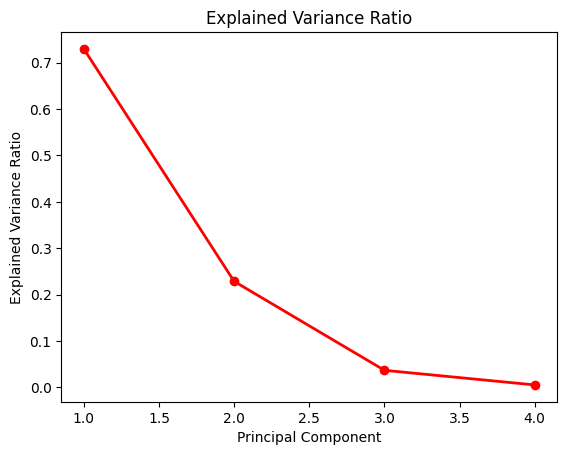

In [68]:
plot_explained_variance(eigenvalues)

In [16]:
def transform_to_new_features(df, eigenvectors):
    # Convert the dataframe to a NumPy array
    X = df.to_numpy()

    # Transform the data using the eigenvectors
    X_transformed = np.dot(X, eigenvectors)

    # Convert the transformed data back to a dataframe
    df_transformed = pd.DataFrame(X_transformed, columns=['NewFeature_{}'.format(i+1) for i in range(eigenvectors.shape[1])])

    return df_transformed

In [17]:
top_2 = eigenvectors[['eigenvector_1', 'eigenvector_2']]

In [38]:
new_df = transform_to_new_features(df, top_2)
new_df.head()

,NewFeature_1,NewFeature_2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df2 = features.copy()
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=features.columns)


In [24]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [30]:
pca = PCA(n_components=4)
pc = pca.fit(df2)
PCs = pc.transform(df2)

In [39]:
print("Eigenvalues::\n",pc.explained_variance_)

Eigenvalues::
 [2.93808505 0.9201649  0.14774182 0.02085386]


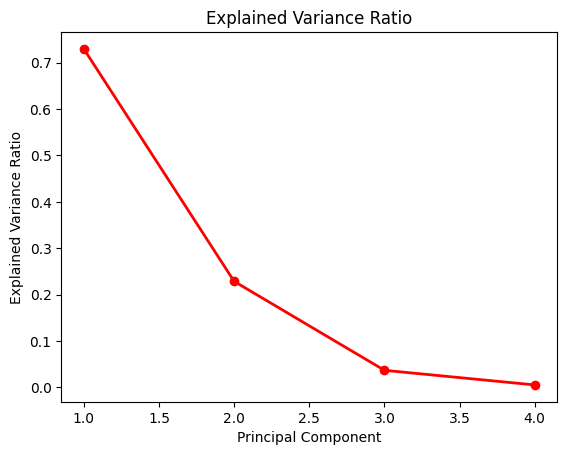

In [35]:
plot_explained_variance(pc.explained_variance_)

In [40]:
new_features = pd.DataFrame(data=PCs, columns=[f'new_feature_{i+1}' for i in range(4)])
new_features.head()

,new_feature_1,new_feature_2,new_feature_3,new_feature_4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [37]:
new_df

,NewFeature_1,NewFeature_2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676
...,...,...
145,1.864258,-0.385674
146,1.559356,0.893693
147,1.516091,-0.268171
148,1.368204,-1.007878
